# **Hands-on Classificação**

---

Classificação com sklearn 

Vamos começar a analisar algoritmos de classificação de acordo com as métricas vistas nas aula anteriores. 

Para isso, usaremos 3 classificadores diferentes. Todas as implementações são provenivientes do sklearn. São eles: 


*   <a href = https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification> KNN </a>
*   <a href = https://scikit-learn.org/stable/modules/svm.html> Support Vector Machine (SVM)</a>
*   <a href = https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html> Random Forest </a>

Esses classificadores são amplamente utilizados no dia-a-dia quando se trata de uma tarefa de classificação. Mais informações sobre esses modelos podem ser encontradas nos links para a documentação do sklearn. 


Vamos utilizar a base de dados **diabetes.csv** </a> que pode ser encontrada no OpenML em: https://www.openml.org/d/37. Essa base descreve o problema de predizer o resultado positivo ou negativo de um teste para diabetes aplicado em um conjunto específico de pacientes na Índia. 


### *Importando* bibliotecas


In [ ]:
import pandas as pd #biblioteca para manipulação de dados
import numpy as np #biblioteca para utilizacao de vetores e matrizes
import matplotlib.pyplot as plt #bibloteca para plotar graficos

In [ ]:
#liberando acesso do colab aos arquivos no drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Carregamento dos dados

In [ ]:
#lendo o csv que contem a base de dados e armazanando em um df
df = pd.read_csv('/content/gdrive/My Drive/IGTI/Aulas Práticas/diabetes.csv')

In [ ]:
#imprimindo as 5 primeiras linhas do df para confirmação
df.head(5)

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


*   preg: number of times pregnant
*   plas: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
*   pres: Diastolic blood pressure (mm Hg)
*   skin: Triceps skin fold thickness (mm)
*   insu: 2-Hour serum insulin (mu U/ml)
*   mass: Body mass index (weight in kg/(height in m)^2)
*   pedi: Diabetes pedigree function
*   age: Age (years)
*   class: Class variable (tested_positive or tested_negative)

In [ ]:
# Verificando o numero de amostras (linhas) e features (colunas) do dataset. 
print('Amostras e Features:', df.shape)

Amostras e Features: (768, 9)


In [ ]:
# Verificando quais são os tipos das features
df.columns

Index(['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age', 'class'], dtype='object')

### Pré processamento

Nesse problema, o único atributo categórico é a classe. Alguns modelos podem ter dificuldade de lidar com esse atributo. Nesse caso, precisamos transformar os valores de "tested_negative" e "tested_positivo" para 0 e 1.

Para isso, vamos fazer uma função bem simples. 

In [ ]:
#criando um dicionario de dados para o mapeamento
name_to_class = {
    'tested_negative': 0,
    'tested_positive': 1
}

#substituindo os valores categóricos pelo mapeamento
df['class'] = df['class'].map(name_to_class)

#check
df.head(5)

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Uma outra etapa importante do pré-processamento consiste na avaliação de dados faltantes. 



In [ ]:
# Analisando o resumo da base
df.describe()

,preg,plas,pres,skin,insu,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Os modelos implementados no sklearn recebem como entrada para a modelagam um ou mais arrays. Dessa forma, precisamos modificar o df original para que seja possível a modelagem correta. 

Para isso, vamos separar o label das amotras, armazenar o nome das featues já que os arrays não fazem isso e depois retirar a coluna de labels do df original. Em seguida, vamos converter o df para array usando o numpy!

In [ ]:
# armazenando os labels em um array
labels = np.array(df['class'])

# salvando a ordem das features
feature_list = list(df.columns)

In [ ]:
# removendo a coluna de labels do df original
df = df.drop('class', axis = 1)

# check
df.columns

Index(['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age'], dtype='object')

In [ ]:
# convertendo df para array
data = np.array(df)

Agora estamos quase prontos para a modelagem em si!

Precisamos apenas separar uma parte dos nossos dados para que seja possível avaliar os modelos que vamos treinar. O sklearn tem uma função para isso: <a href = http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html> train_test_split<a>.

In [ ]:
# importar train_test_split do scikitlearn 
from sklearn.model_selection import train_test_split

# aplicando a funcao train_test_split para separar os conjuntos de treino e 
# teste segundo uma porcentagem de separação definida. 
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size = 0.25, random_state = 42)

### Baseline: Comparando com um modelo aleatorio!

Como falamos durante as aulas teóricas, podemos criar uma base de comparação para os modelos que queremos avaliar. 

No caso da classificação, o baseline pode ser construído a partir de um modelo aleatório. Nesse caso, são atribuídos 0s e 1s de forma aleatória para todas as amostras de teste. Podemos pensar que o modelo baseline é apenas um chute aleatório sobre o resultado do teste positivo ou negativo. 

In [ ]:
# criando baseline
baseline_preds = np.random.choice([0,1], size = len(test_labels))

print(baseline_preds)

[1 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0
 0 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1
 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 0
 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1
 1 0 1 1 0 1 0]


O sklearn tem várias métricas implementadas! :D

Vamos testar essas metricas? 

In [ ]:
# importar biblioteca para calculo de métricas
from sklearn import metrics  

# calculando medidas de erro
# essas medidas são calculadas a partir da comparação com o valor real do nosso conjunto de teste
print('Matriz de Confusão\n', metrics.confusion_matrix(test_labels, baseline_preds)) 
print('\nAcurácia\n', metrics.accuracy_score(test_labels, baseline_preds)) 
print('\nAcurácia Balanceada por classe\n', metrics.balanced_accuracy_score(test_labels, baseline_preds)) 
print('\nPrecision\n', metrics.precision_score(test_labels, baseline_preds)) 
print('\nRecall\n', metrics.recall_score(test_labels, baseline_preds)) 
print('\nF1\n', metrics.f1_score(test_labels, baseline_preds)) 

print('\nAUCROC\n', metrics.roc_auc_score(test_labels, baseline_preds))

Matriz de Confusão
 [[69 54]
 [28 41]]

Acurácia
 0.5729166666666666

Acurácia Balanceada por classe
 0.5775892541534111

Precision
 0.43157894736842106

Recall
 0.5942028985507246

F1
 0.5

AUCROC
 0.5775892541534111


O sklearn oferece uma função que nos dá um resumo das principais métricas de classificação. 
Podemos usar essa função no lugar de printar as métricas separadamente. 

Vamos testar?

In [ ]:
print('\nClassification Report\n', metrics.classification_report(test_labels, baseline_preds)) 


Classification Report
               precision    recall  f1-score   support

           0       0.71      0.56      0.63       123
           1       0.43      0.59      0.50        69

    accuracy                           0.57       192
   macro avg       0.57      0.58      0.56       192
weighted avg       0.61      0.57      0.58       192



Agora que avaliamos nosso baseline e identificamos o erro desse modelo, podemos criar outros modelos de classificação e comparar os resultados encontrados!

Dica: Se não conseguirmos um erro menor do que o baseline, talvez precisemos repensar nossa abordagem.

Vamos dar uma olhada como ficou o nosso baseline em relação as amostras de teste?

*Não se preocupe em compreender o que foi realizado na célula a seguir, todas as manipulações foram realizadas no único intuito de gerar o gráfico.*

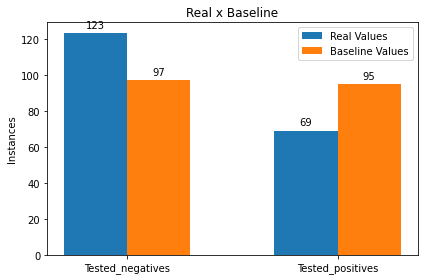

In [ ]:
#criando labels e os valores armazenados nas barras
labels = ['Tested_negatives', 'Tested_positives']
count_test = [(test_labels == 0).sum(), (test_labels == 1).sum()]
count_baseline = [(baseline_preds == 0).sum(), (baseline_preds == 1).sum()]

#criando as barras
x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

#criancdo os plots
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, count_test, width, label='Real Values')
rects2 = ax.bar(x + width/2, count_baseline, width, label='Baseline Values')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Instances')
ax.set_title('Real x Baseline')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

#plotando o grafico de barras agrupadas
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()

plt.show()

# KNN

Vamos aplicar o primeiro modelo de classificação: o k-nearest neighbors!

In [ ]:
# importar o modelo de KNN
from sklearn.neighbors import KNeighborsClassifier 

# treinando o modelo no conjunto de dados de treino
classifier = KNeighborsClassifier().fit(train_data, train_labels);

In [ ]:
# aplicando o modelo treinado para a previsão da temperatura 
#em todo o conjunto de teste
predictions1_labels = classifier.predict(test_data)

# Exibindo dataframe com valores 10 reais e suas respectivas previsões
p = pd.DataFrame({'Real': test_labels, 'Previsto': predictions1_labels})  
p.head(10)

,Real,Previsto
0,0,1
1,0,0
2,0,0
3,0,1
4,0,0
5,0,1
6,0,0
7,0,0
8,0,1
9,0,1


Agora que criamos o modelo do knn e aplicamos o modelo criado ao conjunto de teste, podemos então avaliar o modelo gerado. 

In [ ]:
#avaliando o modelo
print('Matriz de Confusão\n', metrics.confusion_matrix(test_labels, predictions1_labels)) 
print('\nAcurácia\n', metrics.accuracy_score(test_labels, predictions1_labels)) 
print('\nAcurácia Balanceada por classe\n', metrics.balanced_accuracy_score(test_labels, predictions1_labels)) 
print('\nPrecision\n', metrics.precision_score(test_labels, predictions1_labels)) 
print('\nRecall\n', metrics.recall_score(test_labels, predictions1_labels)) 
print('\nF1\n', metrics.f1_score(test_labels, predictions1_labels)) 

print('\nAUCROC\n', metrics.roc_auc_score(test_labels, predictions1_labels))

Matriz de Confusão
 [[88 35]
 [31 38]]

Acurácia
 0.65625

Acurácia Balanceada por classe
 0.6330858960763521

Precision
 0.5205479452054794

Recall
 0.5507246376811594

F1
 0.5352112676056338

AUCROC
 0.633085896076352


Resuminho:

In [ ]:
print('\nClassification Report\n', metrics.classification_report(test_labels, predictions1_labels)) 


Classification Report
               precision    recall  f1-score   support

           0       0.74      0.72      0.73       123
           1       0.52      0.55      0.54        69

    accuracy                           0.66       192
   macro avg       0.63      0.63      0.63       192
weighted avg       0.66      0.66      0.66       192



O knn ja encontrou um erro bem menor do que o encontrado pelo nosso baseline! 
Entretanto, as medidas ainda estão proximas do resultado de um modelo aleatorio. 

Vamos dar uma olhada como ficou o knn em relação as amostras de teste?

*Novamente, não é preciso se preocupar com o código da célula abaixo. *

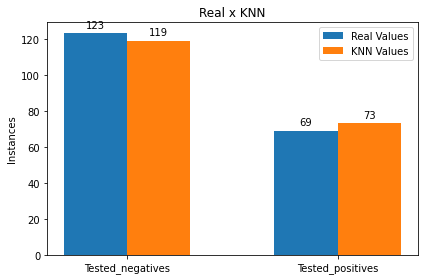

In [ ]:
#criando labels e os valores armazenados nas barras
labels = ['Tested_negatives', 'Tested_positives']
count_test = [(test_labels == 0).sum(), (test_labels == 1).sum()]
count_knn = [(predictions1_labels == 0).sum(), (predictions1_labels == 1).sum()]

#criando as barras
x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

#criancdo os plots
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, count_test, width, label='Real Values')
rects2 = ax.bar(x + width/2, count_knn, width, label='KNN Values')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Instances')
ax.set_title('Real x KNN')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

#plotando o grafico de barras agrupadas
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()

plt.show()

# Support Vector Machine SVM

Vamos dar uma olhada agora no comportamento do SVM

In [ ]:
#importar o modelo SVM
from sklearn.svm import SVC

# instanciacao e determinacao dos hiperparâmetros do SVM: tipo de kernel
classifier = SVC(kernel='rbf')

# treinando o SVM
classifier.fit(train_data,train_labels)

In [ ]:
# aplicando o modelo treinado para a previsão da temperatura 
#em todo o conjunto de teste
predictions2_labels = classifier.predict(test_data)

# Exibindo dataframe com valores 10 reais e suas respectivas previsões
p = pd.DataFrame({'Real': test_labels, 'Previsto': predictions2_labels})  
p.head(10)

,Real,Previsto
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,1
9,0,1


In [ ]:
#avaliando o modelo 
print('Matriz de Confusão\n', metrics.confusion_matrix(test_labels, predictions2_labels)) 
print('\nAcurácia\n', metrics.accuracy_score(test_labels, predictions2_labels)) 
print('\nAcurácia Balanceada por classe\n', metrics.balanced_accuracy_score(test_labels, predictions2_labels)) 
print('\nPrecision\n', metrics.precision_score(test_labels, predictions2_labels)) 
print('\nRecall\n', metrics.recall_score(test_labels, predictions2_labels)) 
print('\nF1\n', metrics.f1_score(test_labels, predictions2_labels)) 

print('\nAUCROC\n', metrics.roc_auc_score(test_labels, predictions2_labels))

Matriz de Confusão
 [[106  17]
 [ 35  34]]

Acurácia
 0.7291666666666666

Acurácia Balanceada por classe
 0.6772711205372923

Precision
 0.6666666666666666

Recall
 0.4927536231884058

F1
 0.5666666666666667

AUCROC
 0.6772711205372923


Resuminho...

In [ ]:
print('\nClassification Report\n', metrics.classification_report(test_labels, predictions2_labels)) 


Classification Report
               precision    recall  f1-score   support

           0       0.75      0.86      0.80       123
           1       0.67      0.49      0.57        69

    accuracy                           0.73       192
   macro avg       0.71      0.68      0.68       192
weighted avg       0.72      0.73      0.72       192



Vamos olhar como ficou o modelo? :)

*Novamente, não precisa se preocupar com o código abaixo.*

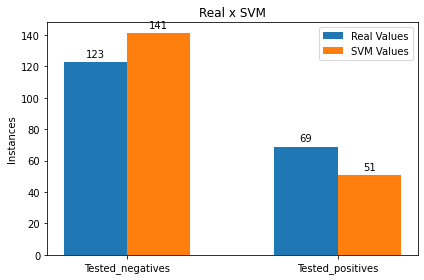

In [ ]:
#criando labels e os valores armazenados nas barras
labels = ['Tested_negatives', 'Tested_positives']
count_test = [(test_labels == 0).sum(), (test_labels == 1).sum()]
count_svm = [(predictions2_labels == 0).sum(), (predictions2_labels == 1).sum()]

#criando as barras
x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

#criancdo os plots
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, count_test, width, label='Real Values')
rects2 = ax.bar(x + width/2, count_svm, width, label='SVM Values')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Instances')
ax.set_title('Real x SVM')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

#plotando o grafico de barras agrupadas
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()

plt.show()

# Random Forest Classifiers


Vamos agora modelar o nosso problema utilizando o Random Forest Classifier!

Esse modelo é um dos mais utilizados tanto na sua versão de regressor quanto para sua versão de classificador e, em geral, apresenta otimos resultados!

In [ ]:
# importar o modelo Random Forest Regressor
from sklearn.ensemble import RandomForestClassifier

# treinando o modelo 
classifier = RandomForestClassifier(n_estimators= 10, random_state=42).fit(train_data, train_labels);

In [ ]:
# aplicando o modelo treinado para a previsão do resultado do teste
predictions3_labels = classifier.predict(test_data)

# Exibindo dataframe com valores 10 reais e suas respectivas previsões
p = pd.DataFrame({'Real': test_labels, 'Previsto': predictions3_labels})  
p.head(10)

,Real,Previsto
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,1
6,0,0
7,0,1
8,0,1
9,0,1


In [ ]:
#avaliando o modelo
print('Matriz de Confusão\n', metrics.confusion_matrix(test_labels, predictions3_labels)) 
print('\nAcurácia\n', metrics.accuracy_score(test_labels, predictions3_labels)) 
print('\nAcurácia Balanceada por classe\n', metrics.balanced_accuracy_score(test_labels, predictions3_labels)) 
print('\nPrecision\n', metrics.precision_score(test_labels, predictions3_labels)) 
print('\nRecall\n', metrics.recall_score(test_labels, predictions3_labels)) 
print('\nF1\n', metrics.f1_score(test_labels, predictions3_labels)) 

print('\nAUCROC\n', metrics.roc_auc_score(test_labels, predictions3_labels))

Matriz de Confusão
 [[97 26]
 [24 45]]

Acurácia
 0.7395833333333334

Acurácia Balanceada por classe
 0.72039589961117

Precision
 0.6338028169014085

Recall
 0.6521739130434783

F1
 0.6428571428571428

AUCROC
 0.72039589961117


Resuminho...



In [ ]:
print('\nClassification Report\n', metrics.classification_report(test_labels, predictions3_labels)) 


Classification Report
               precision    recall  f1-score   support

           0       0.80      0.79      0.80       123
           1       0.63      0.65      0.64        69

    accuracy                           0.74       192
   macro avg       0.72      0.72      0.72       192
weighted avg       0.74      0.74      0.74       192



Vamos olhar como ficou o modelo? :)

*Novamente, não precisa se preocupar com o código abaixo.*

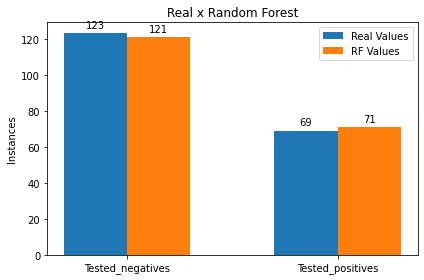

In [ ]:
#criando labels e os valores armazenados nas barras
labels = ['Tested_negatives', 'Tested_positives']
count_test = [(test_labels == 0).sum(), (test_labels == 1).sum()]
count_rf = [(predictions3_labels == 0).sum(), (predictions3_labels == 1).sum()]

#criando as barras
x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

#criancdo os plots
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, count_test, width, label='Real Values')
rects2 = ax.bar(x + width/2, count_rf, width, label='RF Values')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Instances')
ax.set_title('Real x Random Forest')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

#plotando o grafico de barras agrupadas
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()

plt.show()

Vamos agora comparar os resultados do 3 modelos de classificação e o nosso baseline?

In [ ]:
print('Erros do Baseline\n')
print('Classification Report\n', metrics.classification_report(test_labels, baseline_preds)) 


Erros do Baseline

Classification Report
               precision    recall  f1-score   support

           0       0.71      0.56      0.63       123
           1       0.43      0.59      0.50        69

    accuracy                           0.57       192
   macro avg       0.57      0.58      0.56       192
weighted avg       0.61      0.57      0.58       192



In [ ]:
print('Erros do KNN\n')
print('Classification Report\n', metrics.classification_report(test_labels, predictions1_labels)) 

Erros do KNN

Classification Report
               precision    recall  f1-score   support

           0       0.74      0.72      0.73       123
           1       0.52      0.55      0.54        69

    accuracy                           0.66       192
   macro avg       0.63      0.63      0.63       192
weighted avg       0.66      0.66      0.66       192



In [ ]:
print('Erros do SVM')
print('Classification Report\n', metrics.classification_report(test_labels, predictions2_labels)) 

Erros do SVM
Classification Report
               precision    recall  f1-score   support

           0       0.75      0.86      0.80       123
           1       0.67      0.49      0.57        69

    accuracy                           0.73       192
   macro avg       0.71      0.68      0.68       192
weighted avg       0.72      0.73      0.72       192



In [ ]:
print('Erros do Random Forest Classifier')
print('Classification Report\n', metrics.classification_report(test_labels, predictions3_labels)) 

Erros do Random Forest Classifier
Classification Report
               precision    recall  f1-score   support

           0       0.80      0.79      0.80       123
           1       0.63      0.65      0.64        69

    accuracy                           0.74       192
   macro avg       0.72      0.72      0.72       192
weighted avg       0.74      0.74      0.74       192



# Na próxima aula vamos começar a falar sobre métricas de desempenho para clusterização.

#Até lá!